In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('operations.csv')
data.head()

,transaction_date,label,amount,balance_bef_trn,categ,type,expense_slice,debcr,year,month,day,day_week,day_week_num,weekend,quart_month
0,2023-03-31,DONATION XX XX XX XX XX XX XX,-1.44,1515.25,OTHER,DONATION,small,debit,2023,3,31,Friday,5,False,4
1,2023-04-03,PAYMENT XX XX MTA XX,-24.00,1513.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
2,2023-04-03,PAYMENT XX XX MTA XX,-73.00,1489.81,TRANSPORT,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
3,2023-04-03,PAYMENT XX XX XX XX,-14.39,1416.81,OTHER,PAYMENT,small,debit,2023,4,3,Monday,1,False,1
4,2023-04-03,TRANSFER XX XX XX XX XX XX,4.80,1402.42,OTHER,TRANSFER,(not an expense),credit,2023,4,3,Monday,1,False,1


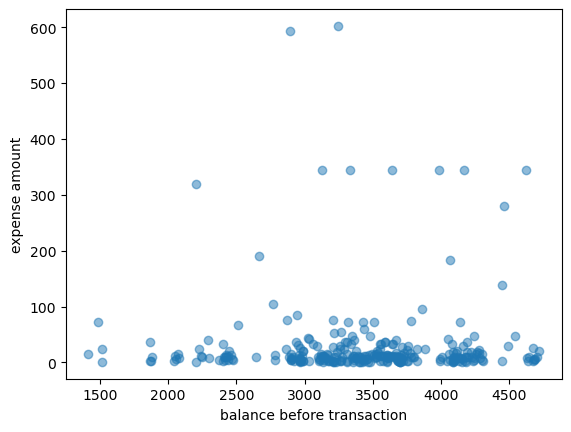

In [5]:
expenses = data[data.amount < 0]
plt.plot(expenses["balance_bef_trn"],-expenses["amount"],'o',alpha=0.5)
plt.xlabel("balance before transaction")
plt.ylabel("expense amount")
plt.show()

In [9]:
import scipy.stats as st
import numpy as np

st.pearsonr(expenses["balance_bef_trn"],-expenses["amount"])[0]

0.014536146489774589

In [11]:
np.cov(expenses["balance_bef_trn"],-expenses["amount"],ddof=0)[1,0]

705.0942213554387

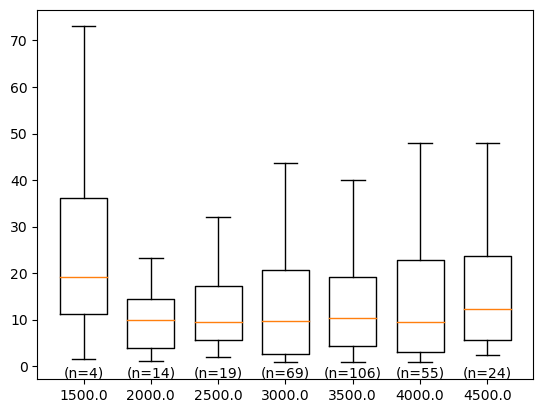

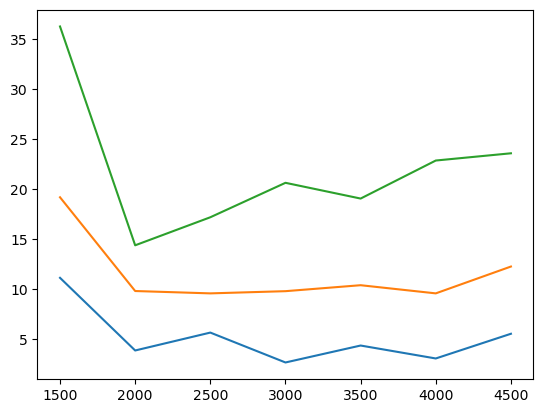

In [12]:
bin_size = 500 # size of bins for discretization

groups = [] # will receive the aggregated data to be displayed

# slices are calculated from 0 to the maximum balance in increments of bin_size]
slices = np.arange(0, max(expenses["balance_bef_trn"]), bin_size)
slices += bin_size/2 # slices are separated by half a bin size
indices = np.digitize(expenses["balance_bef_trn"], slices) # associates each balance with its bin number

for ind, tr in enumerate(slices): # for each slice, ind receives the slice number and tr the slice in question
    amounts = -expenses.loc[indices==ind,"amount"] # selects individuals for the ind slice
    if len(amounts) > 0:
        g = {
            'values': amounts,
            'bin_center': tr-(bin_size/2),
            'size': len(amounts),
            'quartiles': [np.percentile(amounts,p) for p in [25,50,75]]
        }
        groups.append(g)
# display box plots

plt.boxplot([g["values"] for g in groups],
            positions= [g["bin_center"] for g in groups], # X-axis of box plots
            showfliers= False, # outliers are not included
            widths= bin_size*0.7, # graph width of box plots
           )
# displays occurrences for each bin

for g in groups:
    plt.text(g["bin_center"],0,"(n={})".format(g["size"]),horizontalalignment='center',verticalalignment='top')     
plt.show()
# display quartiles

for n_quartile in range(3):
    plt.plot([g["bin_center"] for g in groups],
             [g["quartiles"][n_quartile] for g in groups])
plt.show()